# Model Evaluation & Hyperparameter Tunning

In this exercie, we will take a look at the implementation of multiple model evaluation methods we've mentioned in class and answer some questions related to the plot and the learning curve. 


## Pipeline Implementation VS Non-Pipeline Implementation

In this section we provide you the code to do classification on "breast cancer" dataset without using Pipeline.  You will need to follow the code snippet covered in lecture and finish the code to do the classification with Pipeline. 

In [1]:
import pandas as pd
df= pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases''/breast-cancer-wisconsin/wdbc.data',header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Label Encode the Target

In [2]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

## Split the Data 

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

## Implementation without Pipeline

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

stder = StandardScaler()
pca = PCA(n_components=2)

X_train_std = stder.fit_transform(X_train)
X_test_std = stder.transform(X_test)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)

print('Test Accuracy: %.3f' % lr.score(X_test_pca, y_test))

Test Accuracy: 0.956


## Implementation with Pipeline

In [8]:
# TODO :: Implement the above task by using Pipeline. Your implementation should have the same test accuracy as the 
# implementation without Pipeline. 9 lines of code expected. 

from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


## Cross Validation without Pipeline

In [12]:
import numpy as np
from sklearn.model_selection import StratifiedKFold


X_train_std = stder.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_std)

kfold= StratifiedKFold(n_splits=10,random_state=1).split(X_train_std, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    lr = LogisticRegression()
    lr.fit(X_train_pca[train], y_train[train])
    score = lr.score(X_train_pca[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,np.bincount(y_train[train]), score))
    print('CVaccuracy: %.3f +/-%.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [256 153], Acc: 0.935
CVaccuracy: 0.935 +/-0.000
Fold:  2, Class dist.: [256 153], Acc: 0.935
CVaccuracy: 0.935 +/-0.000
Fold:  3, Class dist.: [256 153], Acc: 0.957
CVaccuracy: 0.942 +/-0.010
Fold:  4, Class dist.: [256 153], Acc: 0.957
CVaccuracy: 0.946 +/-0.011
Fold:  5, Class dist.: [256 153], Acc: 0.935
CVaccuracy: 0.943 +/-0.011
Fold:  6, Class dist.: [257 153], Acc: 0.956
CVaccuracy: 0.945 +/-0.011
Fold:  7, Class dist.: [257 153], Acc: 0.978
CVaccuracy: 0.950 +/-0.015
Fold:  8, Class dist.: [257 153], Acc: 0.911
CVaccuracy: 0.945 +/-0.019
Fold:  9, Class dist.: [257 153], Acc: 0.956
CVaccuracy: 0.946 +/-0.018
Fold: 10, Class dist.: [257 153], Acc: 0.956
CVaccuracy: 0.947 +/-0.018


/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


## Cross Validation with Pipeline

In [13]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold= StratifiedKFold(n_splits=10,random_state=1).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,np.bincount(y_train[train]), score))
    print('CVaccuracy: %.3f +/-%.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [256 153], Acc: 0.935
CVaccuracy: 0.935 +/-0.000
Fold:  2, Class dist.: [256 153], Acc: 0.935
CVaccuracy: 0.935 +/-0.000
Fold:  3, Class dist.: [256 153], Acc: 0.957
CVaccuracy: 0.942 +/-0.010
Fold:  4, Class dist.: [256 153], Acc: 0.957
CVaccuracy: 0.946 +/-0.011
Fold:  5, Class dist.: [256 153], Acc: 0.935
CVaccuracy: 0.943 +/-0.011
Fold:  6, Class dist.: [257 153], Acc: 0.956
CVaccuracy: 0.945 +/-0.011
Fold:  7, Class dist.: [257 153], Acc: 0.978
CVaccuracy: 0.950 +/-0.015
Fold:  8, Class dist.: [257 153], Acc: 0.933
CVaccuracy: 0.948 +/-0.015
Fold:  9, Class dist.: [257 153], Acc: 0.956
CVaccuracy: 0.949 +/-0.014
Fold: 10, Class dist.: [257 153], Acc: 0.956
CVaccuracy: 0.950 +/-0.014


/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


## Question 1 

Did you notice that the final CVaccuracy of implementation with Pipeline and without Pipeline is different? I made a common mistake in cross validation without Pipeline code. Can you help me to fix this bug and explain why it is a problem?


In [19]:
# TODO :: Correct the implementation without pipeline, 13-20 lines of code expected.

# The problem is didn't standardize. Need to do stder transform and pca transform.
# scaling is important since some features with large numbers can be seen as more important.
# After adding it, the CVaccuracy is the same as with the pipeline.

import numpy as np
from sklearn.model_selection import StratifiedKFold


X_train_std = stder.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_std)

kfold= StratifiedKFold(n_splits=10,random_state=1).split(X_train_std, y_train)
scores = []
stder = StandardScaler()
pca = PCA(n_components=2)

for k, (train, test) in enumerate(kfold):
    X_train_std = stder.fit_transform(X_train[train])
    X_test_std = stder.transform(X_train[test])

    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)
    
    lr = LogisticRegression()
    lr.fit(X_train_pca, y_train[train])
    score = lr.score(X_test_pca, y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,np.bincount(y_train[train]), score))
    print('CVaccuracy: %.3f +/-%.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [256 153], Acc: 0.935
CVaccuracy: 0.935 +/-0.000
Fold:  2, Class dist.: [256 153], Acc: 0.935
CVaccuracy: 0.935 +/-0.000
Fold:  3, Class dist.: [256 153], Acc: 0.957
CVaccuracy: 0.942 +/-0.010
Fold:  4, Class dist.: [256 153], Acc: 0.957
CVaccuracy: 0.946 +/-0.011
Fold:  5, Class dist.: [256 153], Acc: 0.935
CVaccuracy: 0.943 +/-0.011
Fold:  6, Class dist.: [257 153], Acc: 0.956
CVaccuracy: 0.945 +/-0.011
Fold:  7, Class dist.: [257 153], Acc: 0.978
CVaccuracy: 0.950 +/-0.015
Fold:  8, Class dist.: [257 153], Acc: 0.933
CVaccuracy: 0.948 +/-0.015
Fold:  9, Class dist.: [257 153], Acc: 0.956
CVaccuracy: 0.949 +/-0.014
Fold: 10, Class dist.: [257 153], Acc: 0.956
CVaccuracy: 0.950 +/-0.014


/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


## Cross Validation VS Nested Cross Validation

The following code uses SVM model with rbf kernel to classifiy the iris dataset. It evaluates the model by using both cross validation and nested cross validation.  It also plots the evaluation score. Read and execute the following code section and answer the question below. (hint : the sklearn document can help you to understand the code better)

Automatically created module for IPython interactive environment


/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/User

/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/User

/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/User

/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/User

/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/howard/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/User

Average difference of 0.008667 with std. dev. of 0.006475.


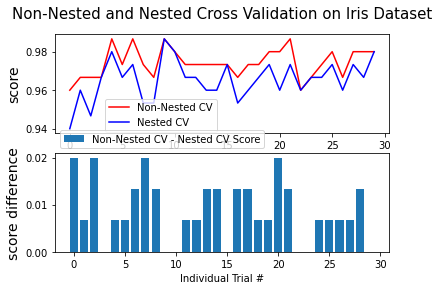

In [15]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

print(__doc__)

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv,
                       iid=False)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

## Question 2

The above plots show the score and score difference of cross validation versus nested cross validation.  What obervation can be made in terms of the score of the two methods. Why does that happen? Which one do you think is a better way to evaluate the performance of the model? Why do you think so?

The nested CV score is lower than the non nested CV score. The nested CV better fits the model with the inner loop. The non nested CV can overfit and be overly optimistic. I believe the nested CV is a better way to evaluate the model as it reduces bias.


## Question 3

Read the code above especially in the loop for each trial. Explain what does this line : nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv) do?

It does the nested cross validation using the clf (GridSearchCV with param grid p_grid) in the inner loop to the get best estimator for each run of the cross validation.
